In [1]:
import json
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Possible RQs

- Do the human values expressed in a ChangeMyView title effect the stability of a conversation?
    - See if the style (i.e. valence, arousal, dominance and concreteness) change as the comments progress for a post (sort by time)
    - Do conflicts arise (see change in emotion)
    - Not really possible given low comments per post
- Do specific human values induce negativity (per debater or per post)?
    - Sentiment analysis 
    - All seem neutral

In [2]:
PATH = "debaters"

def load_json(path):
    with open(path) as f:
        data = [json.loads(line) for line in tqdm(f.readlines())]
    return data

comments = load_json(os.path.join(PATH, "comments.jsonl"))
debaters_full = load_json(os.path.join(PATH, "debaters-full.jsonl"))
debaters = load_json(os.path.join(PATH, "debaters.jsonl"))

100%|████████████████████████████████████| 3801/3801 [00:00<00:00, 10862.90it/s]


Number of debaters: 3801
Number of posts: 27020
Mean number of comments per post: 9.356291635825315
Mean number of posts per user: 66.51065509076558
Total number of comments among all posts: 252807


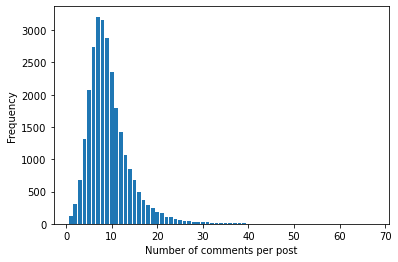

In [3]:
posts = {}
total_comments = 0

for x in comments:
    for c in x["comments"]:
        title = c["op_title"]
        features =  [c["text"], c["created_utc"], 
                     c["style"]["valence"], c["style"]["arousal"], 
                     c["style"]["dominance"], c["style"]["concreteness"]]
        if title not in posts:
            posts[title] = [features]
        else:
            posts[title].append(features)
        total_comments += 1
        
comments_len = [len(x) for x in posts.values()]
posts_len = [len(x["comments"]) for x in debaters]

print("Number of debaters:", len(comments))
print("Number of posts:", len(posts))
print("Mean number of comments per post:", np.mean(comments_len))
print("Mean number of posts per user:", np.mean(posts_len))
print("Total number of comments among all posts:", total_comments)

lens, counts = np.unique(comments_len, return_counts=True)
plt.bar(lens, counts)
plt.xlabel("Number of comments per post")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Get converstation
analyzer = SentimentIntensityAnalyzer()
ex = list(posts.keys())[7]
df = pd.DataFrame(posts[ex], columns=["Post", "Time", "Valence", "Arousal", "Dominance", "Concreteness"])
df = df.sort_values(by=['Time'])

print("Post title:", ex, "\n")
for i in range(df.shape[0]):
    c = df.iloc[i,0]
    print("Comment", i, ":", c)
    print(analyzer.polarity_scores(c))
    print("----")

Post title: CMV: Rock music is no longer culturally relevant 

Comment 0 : Seems like you are making the mistake of assuming that your experience is the experience of all of society.  I have even heard of Fetty Wap so maybe that is not the song of the summer.  And of the four "most important" albums that you listed, two of them are arguably rock records.
{'neg': 0.076, 'neu': 0.845, 'pos': 0.079, 'compound': 0.0498}
----
Comment 1 : I can promise you that rock is still very relevant in our culture.

The "mainstream" music (rock included) that you hear on the radio is engineered to be... well mainstream. They're targeted at young people. Them being vocal and social about pop music, rock is usually not seen in the picture.

I never got into rock until a few months ago. Before that, it seemed so boring. But I did notice a lot of people (usually 30+ years of age) seemed love rock music. Whenever I'd visit their homes, there were collections of guitars and rock posters hanging up on the wal